In [1]:
import pandas as pd
import shap
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, ShuffleSplit, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from PIL import Image, ImageOps
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, ndcg_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from PIL import Image, ImageOps
import lime
import lime.lime_tabular

In [10]:
df = pd.read_csv("NBA Champion RawData.csv")
print(list(df.columns))

['Season', 'Team/Season', 'Team', 'Team ID', 'Team ID/Season', 'Conference', 'Conference/Season', 'max_player', 'playoff_seed', 'po_seed_conference', 'rd_1_matchup_season', 'rd_2_matchup_season', 'rd_3_matchup_season', 'rd_4_matchup_season', 'sum_po_max_player', 'conference 5=> rec', 'conference_OR', 'conference_SRS', 'conference_age', 'pre_playoff_odds', 'pso', 'champion', 'champion_share', 'make_playoffs', 'top_3_conference', 'rk_conference', 'overall_record', 'over500_rec', 'over600_rec', '20 =< wins', '5 => rec', 'home_rec', 'road_rec', 'pre_all_star', 'post_all_star', '3 => rec', '10 =< rec', 'sum_coach_playoff_games', 'sum_coy_shares', 'sum_playoff_games', 'sum_champion', 'sum_champion_share', 'sum_mvp_shares', 'sum_all_defense', 'sum_all_nba', 'sum_dpoy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_all_stars', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'sum_L3S_mvp_shares', 'sum_L5S_mvp_shares', 'sum_franchise_L1S_cs', 'sum_franchise

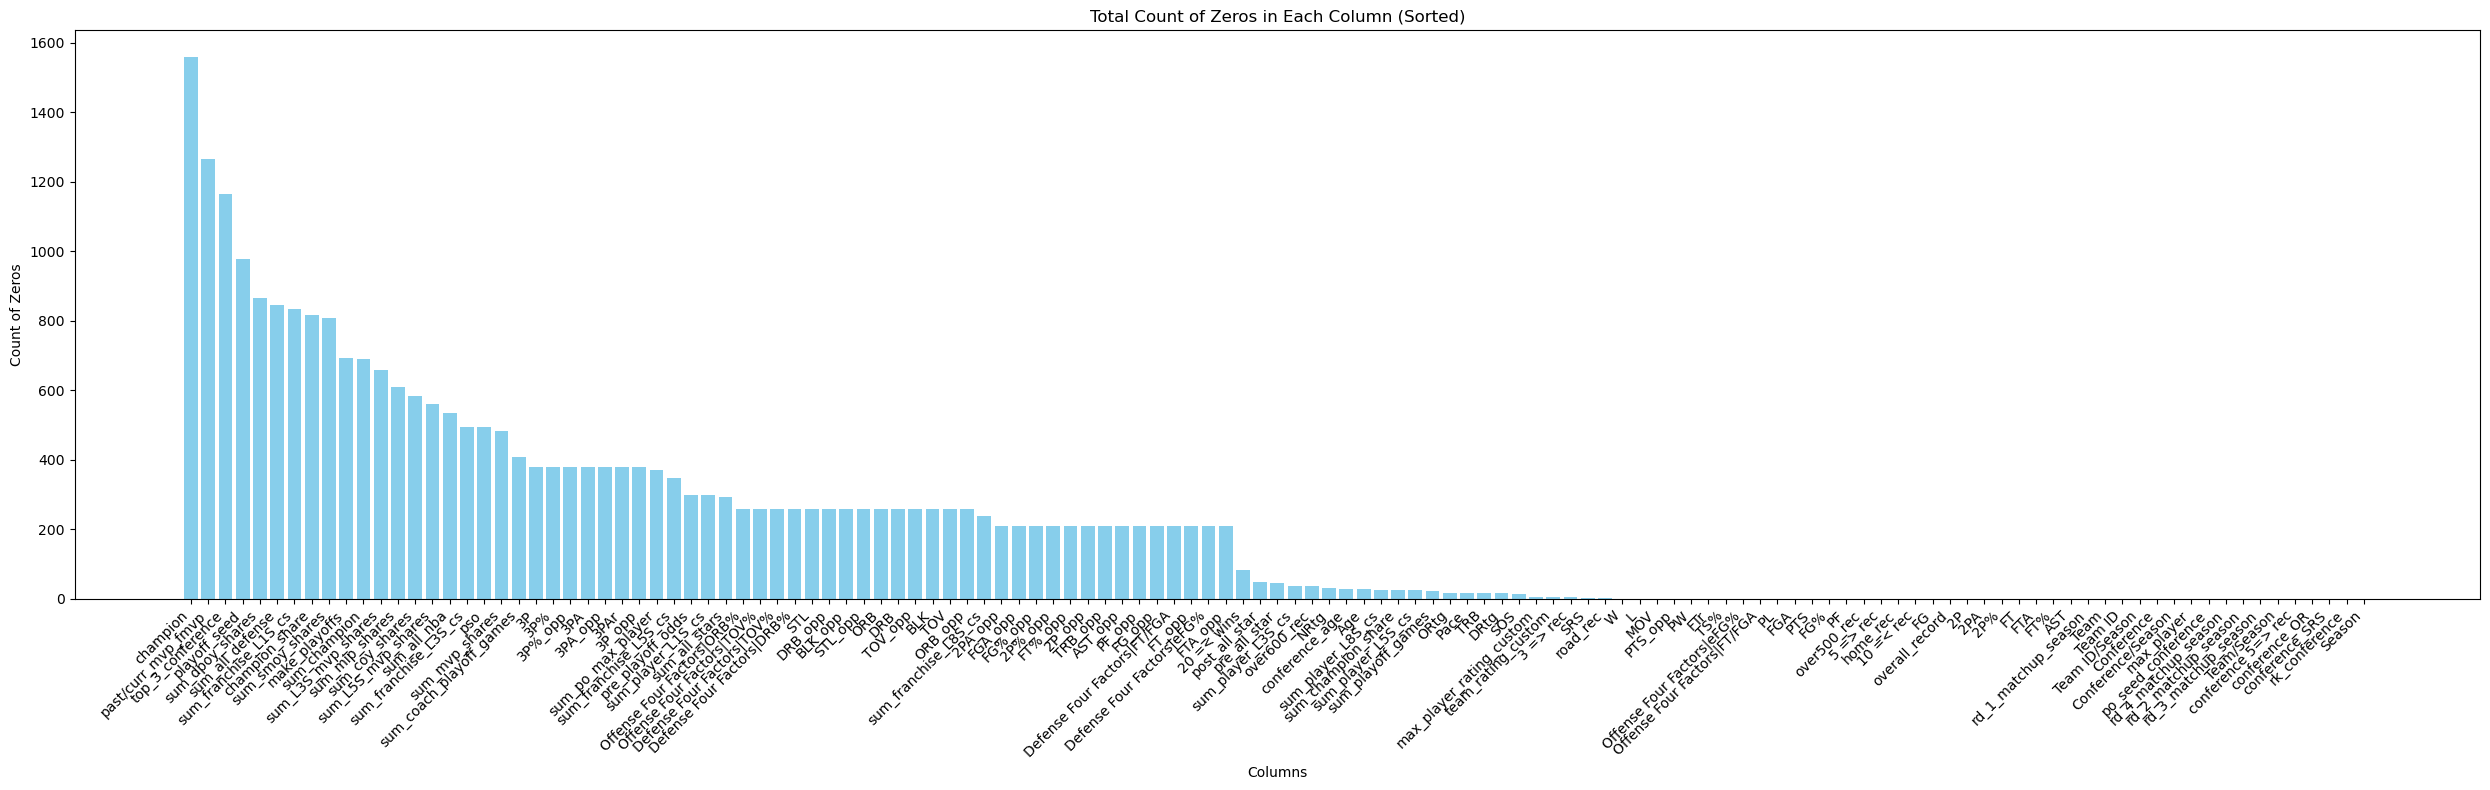

In [6]:
zero_counts = df.eq(0).sum()

zero_counts_sorted = zero_counts.sort_values(ascending=False)

plt.figure(figsize=(25, 8))
plt.bar(zero_counts_sorted.index, zero_counts_sorted.values, color='skyblue')
plt.title('Total Count of Zeros in Each Column (Sorted)')
plt.xlabel('Columns')
plt.ylabel('Count of Zeros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
data_columns = ['playoff_seed','sum_po_max_player', 'conference 5=> rec', 'conference_OR', 'conference_SRS', 'conference_age', 'pre_playoff_odds', 'pso', 'champion', 'champion_share', 'make_playoffs', 'top_3_conference', 'rk_conference', 'overall_record', 'over500_rec', 'over600_rec', '20 =< wins', '5 => rec', 'home_rec', 'road_rec', 'pre_all_star', 'post_all_star', '3 => rec', '10 =< rec', 'sum_coach_playoff_games', 'sum_coy_shares', 'sum_playoff_games', 'sum_champion', 'sum_champion_share', 'sum_mvp_shares', 'sum_all_defense', 'sum_all_nba', 'sum_dpoy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_all_stars', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'sum_L3S_mvp_shares', 'sum_L5S_mvp_shares', 'sum_franchise_L1S_cs', 'sum_franchise_L3S_cs', 'sum_franchise_L5S_cs', 'sum_franchise_L8S_cs', 'team_rating_custom', 'max_player_rating_custom', 'past/curr_mvp_fmvp', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG_opp', 'FGA_opp', 'FG%_opp', '3P_opp', '3PA_opp', '3P%_opp', '2P_opp', '2PA_opp', '2P%_opp', 'FT_opp', 'FTA_opp', 'FT%_opp', 'ORB_opp', 'DRB_opp', 'TRB_opp', 'AST_opp', 'STL_opp', 'BLK_opp', 'TOV_opp', 'PF_opp', 'PTS_opp', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Offense Four Factors|eFG%', 'Offense Four Factors|TOV%', 'Offense Four Factors|ORB%', 'Offense Four Factors|FT/FGA', 'Defense Four Factors|eFG%', 'Defense Four Factors|TOV%', 'Defense Four Factors|DRB%', 'Defense Four Factors|FT/FGA']

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

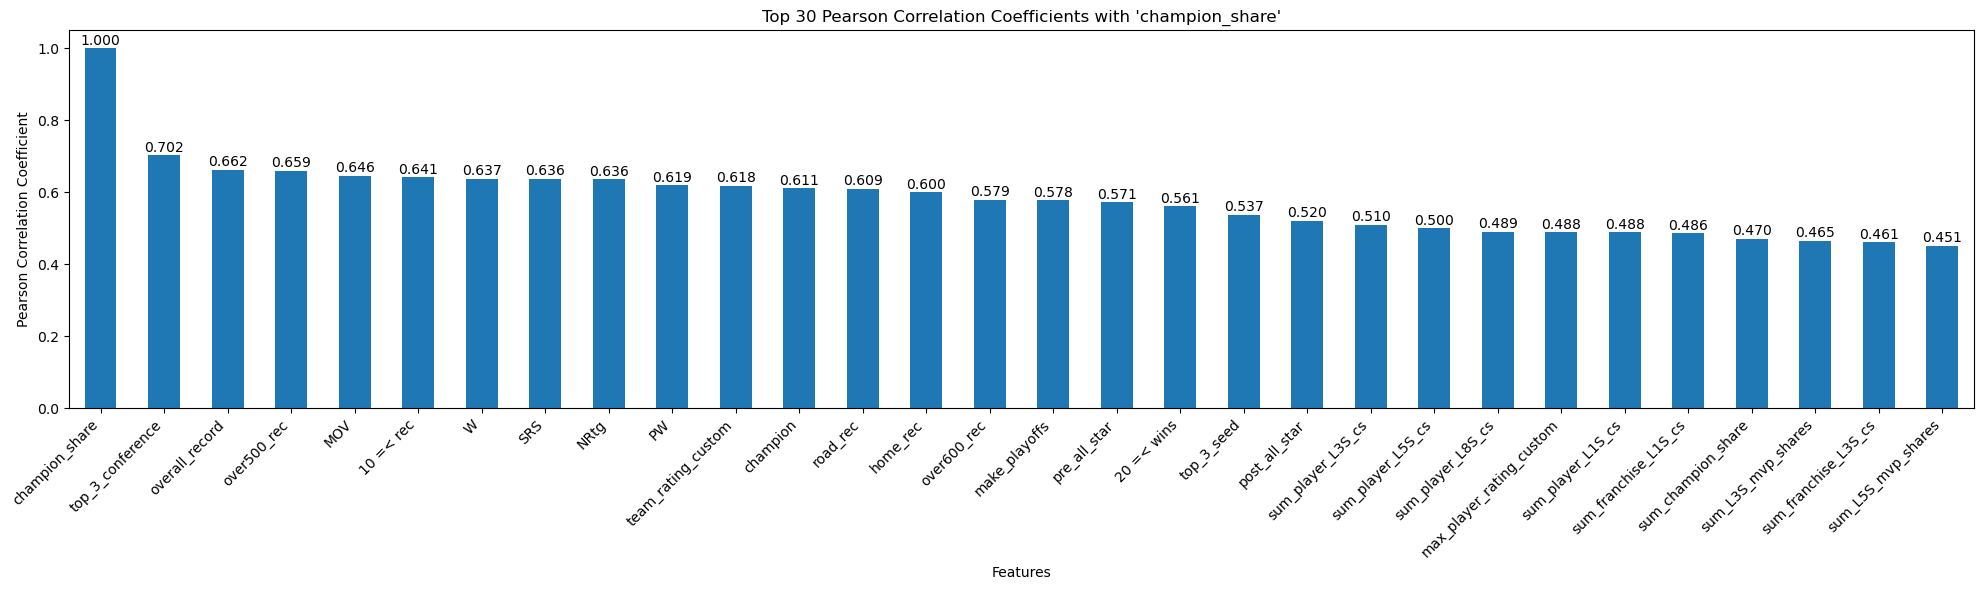

In [112]:

correlations = df[data_columns].corrwith(df['champion_share'])
correlations = correlations.sort_values(ascending=False)

top_correlations = correlations[:30]

plt.figure(figsize=(20, 6))
top_correlations.plot(kind='bar')
plt.title("Top 30 Pearson Correlation Coefficients with 'champion_share'")
plt.xlabel("Features")
plt.ylabel("Pearson Correlation Coefficient")
plt.xticks(rotation=45, ha='right')

for i, val in enumerate(top_correlations):
    plt.text(i, val + 0.01, f'{val:.3f}', ha='center')

plt.tight_layout()
plt.show()

In [14]:
correlation_matrix = data.corr()

correlation_threshold = .9

columns_to_remove = set()
print("Columns to be Removed:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            if feature_i not in columns_to_remove:
                columns_to_remove.add(feature_j)
                print(f"{feature_j} (correlated with {feature_i}): {correlation:.2f}")

data_filtered = data.drop(columns=columns_to_remove)

Columns to be Removed:
conference_SRS (correlated with conference_OR): 0.95
Age (correlated with conference_age): 0.92
over500_rec (correlated with overall_record): 0.94
home_rec (correlated with overall_record): 0.92
road_rec (correlated with overall_record): 0.90
10 =< rec (correlated with overall_record): 0.95
team_rating_custom (correlated with overall_record): 0.94
W (correlated with overall_record): 0.97
L (correlated with overall_record): -0.95
PW (correlated with overall_record): 0.94
PL (correlated with overall_record): -0.92
MOV (correlated with overall_record): 0.96
SRS (correlated with overall_record): 0.96
NRtg (correlated with overall_record): 0.95
sum_champion_share (correlated with sum_playoff_games): 0.94
sum_player_L8S_cs (correlated with sum_playoff_games): 0.90
sum_all_stars (correlated with sum_all_nba): 0.91
sum_franchise_L1S_cs (correlated with sum_player_L1S_cs): 0.95
sum_player_L5S_cs (correlated with sum_player_L3S_cs): 0.96
sum_player_L8S_cs (correlated with 

In [15]:
print("Columns in data_filtered:")
print(", ".join(f"'{column}'" for column in data_filtered.columns))

print("\nColumns that were removed:")
print(", ".join(f"'{removed_column}'" for removed_column in columns_to_remove))

Columns in data_filtered:
'playoff_seed', 'sum_po_max_player', 'conference 5=> rec', 'conference_OR', 'conference_age', 'pre_playoff_odds', 'pso', 'champion', 'champion_share', 'make_playoffs', 'top_3_conference', 'rk_conference', 'overall_record', 'over600_rec', '20 =< wins', '5 => rec', 'pre_all_star', 'post_all_star', '3 => rec', 'sum_coach_playoff_games', 'sum_coy_shares', 'sum_playoff_games', 'sum_champion', 'sum_mvp_shares', 'sum_all_defense', 'sum_all_nba', 'sum_dpoy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_L3S_mvp_shares', 'sum_franchise_L3S_cs', 'sum_franchise_L8S_cs', 'max_player_rating_custom', 'past/curr_mvp_fmvp', 'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'PF', 'FG_opp', 'PTS_opp', 'SOS', 'ORtg', 'Pace', 'FTr', 'Defense Four Factors|FT/FGA'

Columns that were removed:
'sum_all_stars', '3P_opp', 'DRtg', 'TOV', '3PA_opp', 'Defense Four Factors|eFG%', 'PTS', 'BLK_opp', 'STL

In [7]:
print(list(df.columns))

['Season', 'Team/Season', 'Team', 'Team ID', 'Team ID/Season', 'Conference', 'Conference/Season', 'max_player', 'playoff_seed', 'po_seed_conference', 'rd_1_matchup_season', 'rd_2_matchup_season', 'rd_3_matchup_season', 'rd_4_matchup_season', 'sum_po_max_player', 'conference 5=> rec', 'conference_OR', 'conference_SRS', 'conference_age', 'pre_playoff_odds', 'pso', 'champion', 'champion_share', 'make_playoffs', 'top_3_conference', 'rk_conference', 'overall_record', 'over500_rec', 'over600_rec', '20 =< wins', '5 => rec', 'home_rec', 'road_rec', 'pre_all_star', 'post_all_star', '3 => rec', '10 =< rec', 'sum_coach_playoff_games', 'sum_coy_shares', 'sum_playoff_games', 'sum_champion', 'sum_champion_share', 'sum_mvp_shares', 'sum_all_defense', 'sum_all_nba', 'sum_dpoy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_all_stars', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'sum_L3S_mvp_shares', 'sum_L5S_mvp_shares', 'sum_franchise_L1S_cs', 'sum_franchise

In [16]:
features = ['conference 5=> rec', 'conference_OR', 'conference_age', 'pso',
            'over600_rec', 'DRtg', 'top_3_conference',
            '20 =< wins', '5 => rec', 'sum_coach_playoff_games', 'sum_coy_shares', 'sum_playoff_games', 'sum_champion', 'sum_mvp_shares', 'team_rating_custom','Age',
            'sum_all_defense', 'sum_all_nba', 'sum_dpoy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'Offense Four Factors|eFG%',
             'sum_L3S_mvp_shares', 'sum_franchise_L1S_cs', 'sum_franchise_L3S_cs', 'sum_franchise_L8S_cs', 'max_player_rating_custom', 
            'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'PF', 'FG_opp', 'PTS_opp', 'SOS', 'ORtg', 'Pace', 'FTr', 'Defense Four Factors|eFG%']

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 49


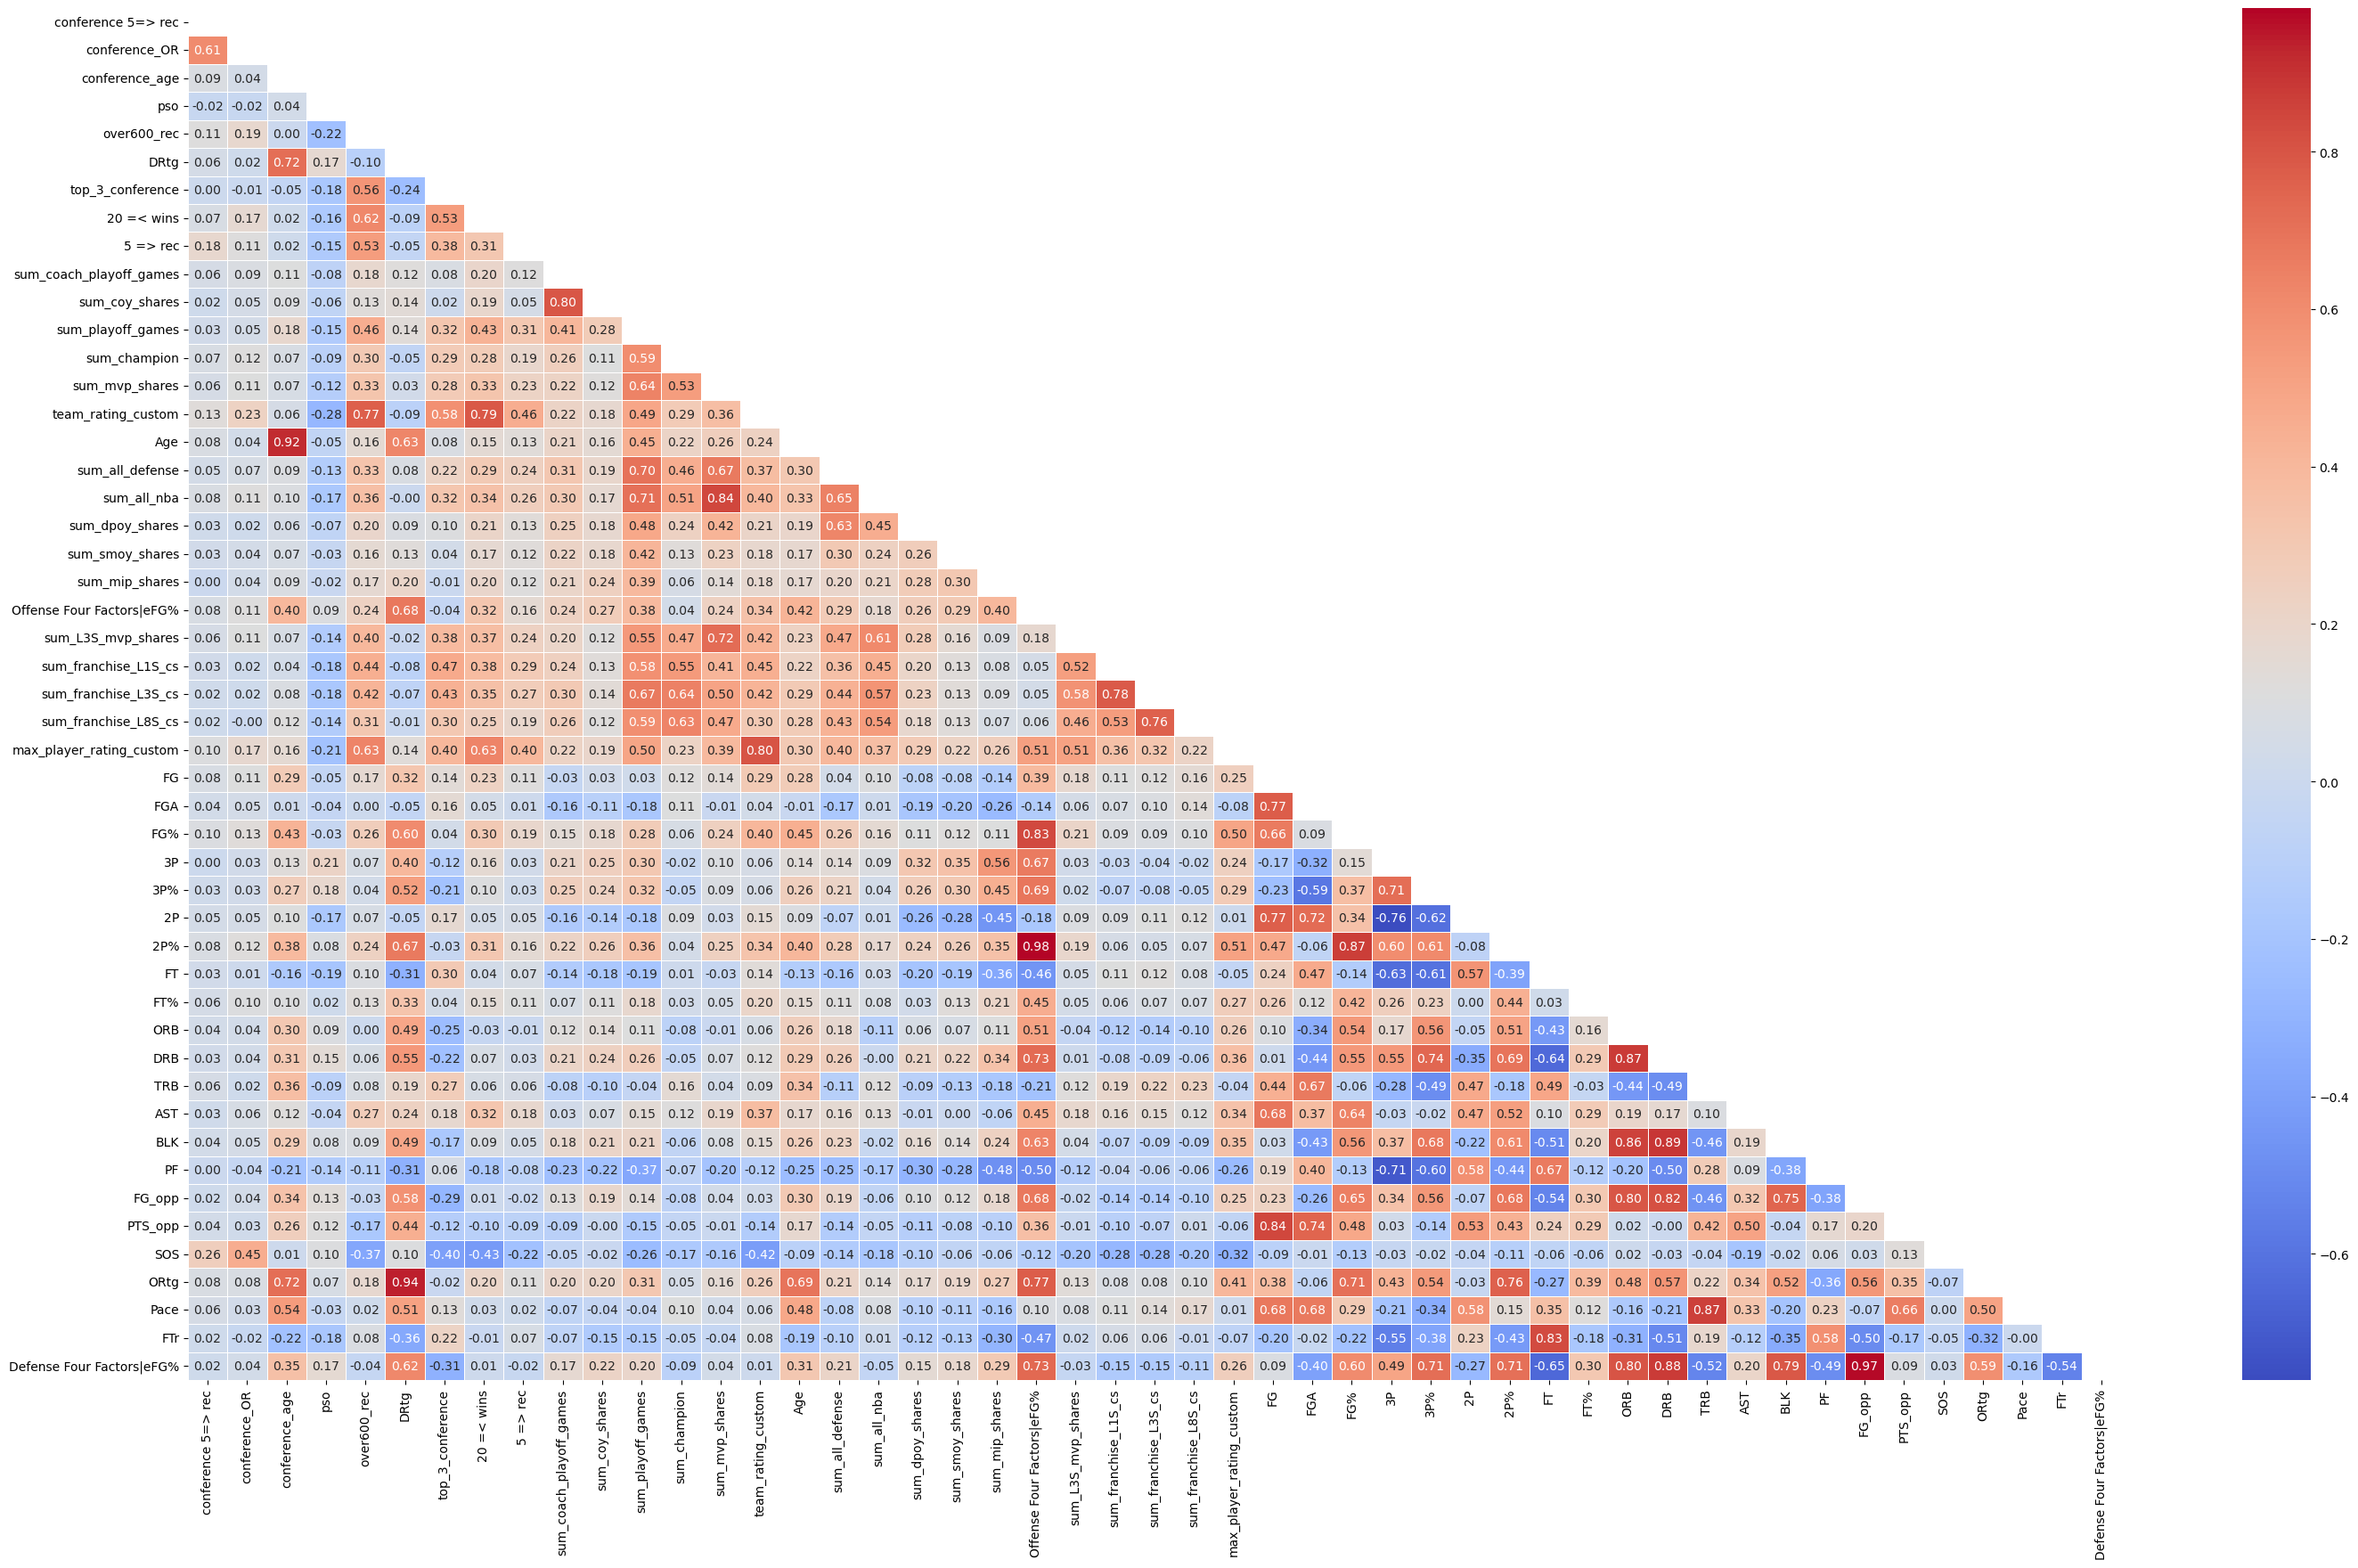

In [24]:
selected_features_data = data[features]
correlation_matrix = selected_features_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(35, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.show()

## Random-Forest Regression:

Results:

    Season                    Team  champion_share  predicted_cs
13    2024          Boston Celtics          1.0000      0.717229
17    2024  Minnesota Timberwolves          0.5625      0.623140
14    2024          Denver Nuggets          0.4375      0.589474
20    2024         Milwaukee Bucks          0.1250      0.500756
15    2024   Oklahoma City Thunder          0.3750      0.479417
18    2024         New York Knicks          0.4375      0.381142
28    2024              Miami Heat          0.0625      0.245578
27    2024      Los Angeles Lakers          0.0625      0.233623
29    2024       Memphis Grizzlies          0.0000      0.224062
21    2024          Indiana Pacers          0.5000      0.200193
-----------------------------------------------------------------------------

NDCG Scores: 

True NDCG @:  0.9693698547395366
-----------------------------------------------------------------------------



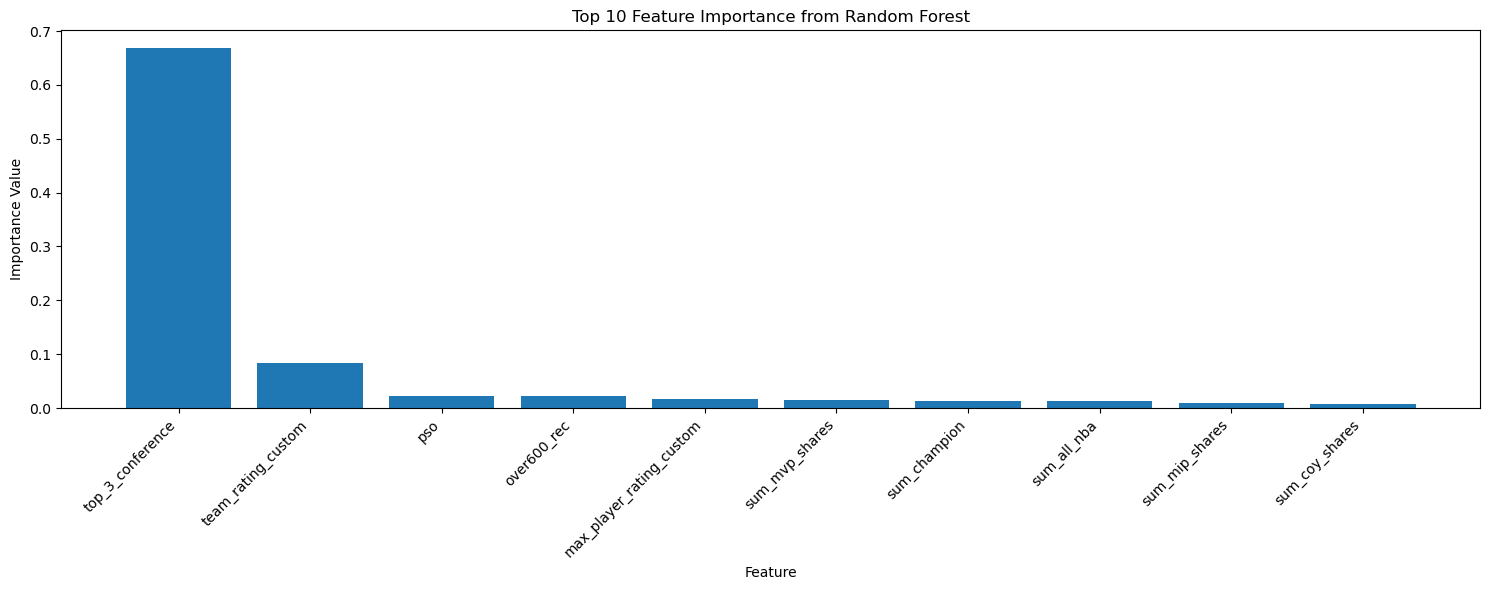

In [25]:
df = pd.read_csv("NBA Champion RawData.csv")
df.drop(df[df['Season'] < 1983].index, inplace = True)

train = df[df["Season"] < 2024].copy()
test = df[df["Season"] == 2024].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features] = sc.transform(train[features])
test[features] = sc.transform(test[features])

rf = RandomForestRegressor(n_estimators=22, random_state=5, min_samples_split=3, max_depth=5)
rf.fit(train[features], train["champion_share"])

predictions = rf.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

print("Results:")
print("=============================================================================\n")
print(frame.head(10))
print("-----------------------------------------------------------------------------\n")

def ndcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        dcg = np.sum(r / np.log2(np.arange(2, r.size + 2)))
        idcg = np.sum(np.sort(r)[::-1] / np.log2(np.arange(2, r.size + 2)))
        return dcg / idcg
    return 0.

def calculate_ndcg(df, k=14):
    true_relevance = df['champion_share'].values
    return ndcg_at_k(true_relevance, k)

ndcg_score_true = calculate_ndcg(frame, k=14)

print("NDCG Scores: ")
print("=============================================================================\n")
print("True NDCG @: ", ndcg_score_true)
print("-----------------------------------------------------------------------------\n")

feature_importances = rf.feature_importances_
feature_importance_dict = dict(zip(features, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_features = sorted_feature_importance[:10]
features_names = [x[0] for x in top_features]
importances = [x[1] for x in top_features]

plt.figure(figsize=(15, 6))
plt.bar(features_names, importances)
plt.title('Top 10 Feature Importance from Random Forest')
plt.ylabel('Importance Value')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

predictions = rf.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
rf_reg_frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
rf_reg_frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

In [26]:
actual = frame.sort_values("champion_share", ascending=False)
predicted = frame.sort_values("predicted_cs", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(1) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame):
    actual = frame.sort_values("champion_share", ascending=False).head(1) #HEAD

    predicted = frame.sort_values("predicted_cs", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame)
print("=============================================================================\n")
print("AP Champion: ", ap)

Ranking Accuracy (Champion):

   Season_x            Team  champion_share_x  predicted_cs_x  Rank  Season_y  champion_share_y  predicted_cs_y  Predicted Rank
0      2024  Boston Celtics               1.0        0.717229     1      2024               1.0        0.717229               1

AP Champion:  1.0


In [27]:

rf_reg_combined_predictions = pd.DataFrame(columns=["Season", "Team/Season", "Team", "predicted_cs", "champion_share"])

all_predictions = []
aps = []
ndcgs = []

backtest_seasons = [2024,2023,2022,2021,2020]
#backtest_seasons = [2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010]

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    rf.fit(train[features], train['champion_share'])
    predictions = rf.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
    frame = pd.concat([test[["Team", "champion_share", "Season"]], predictions_df], axis=1)

    frame['Team/Season'] = frame['Team'] + ' ' + frame['Season'].astype(str)

    # Append the predictions for the current season to the combined predictions DataFrame
    rf_reg_combined_predictions = pd.concat([rf_reg_combined_predictions, frame], ignore_index=True)

    if not frame.empty:
        all_predictions.append(frame)
        ap = find_ap(frame)
        aps.append(ap)

        ndcg = ndcg_score(frame["champion_share"].values.reshape(1, -1), predictions.reshape(1, -1))
        ndcgs.append(ndcg)

        reciprocal_ap = 1 / ap
        print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)} | NDCG: {round(ndcg, 2)}")
    else:
        print(f"No data for Season {season}")

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted_cs", ascending=False).head(10)

    print(f"\nTop 5 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted_cs", "champion_share"]])

average_ndcg = np.mean(ndcgs)
average_ap = np.mean(aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_ndcg = 1.0 / average_ndcg

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"Average Champion Rank: {round(reciprocal_average_ap, 2)} | Reciprocal NDCG: {round(reciprocal_ndcg, 2)}")
print(f"Min Champion Rank: {round(reciprocal_min_ap, 2)}")
print(f"Max Champion Rank: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

rf_reg_combined_predictions.to_csv("rf_reg_nba_preds.csv", index=False)

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Champion AP for Season 2024: 1.0 | Reciprocal: 1.0 | NDCG: 0.9
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0 | NDCG: 0.9
Champion AP for Season 2022: 1.0 | Reciprocal: 1.0 | NDCG: 0.93
Champion AP for Season 2021: 1.0 | Reciprocal: 1.0 | NDCG: 0.93
Champion AP for Season 2020: 1.0 | Reciprocal: 1.0 | NDCG: 0.96

Top 5 Predicted Teams for Season 2024:
                      Team  predicted_cs  champion_share
13          Boston Celtics      0.717229          1.0000
17  Minnesota Timberwolves      0.623140          0.5625
14          Denver Nuggets      0.589474          0.4375
20         Milwaukee Bucks      0.500756          0.1250
15   Oklahoma City Thunder      0.479417          0.3750
18         New York Knicks      0.381142          0.4375
28              Miami Heat      0.245578          0.0625
27      Los Angeles Lakers      0.233623          0.0625
29       Memphis Grizzlies      0.224062          0.0000
21          Indiana Pacers      0.200193          0.5000

Top 5 Predicte

Top 10 Features:
['top_3_conference', 'team_rating_custom', 'ORB', 'over600_rec', 'max_player_rating_custom', 'SOS', 'pso', 'sum_franchise_L1S_cs', 'sum_playoff_games', 'sum_champion']


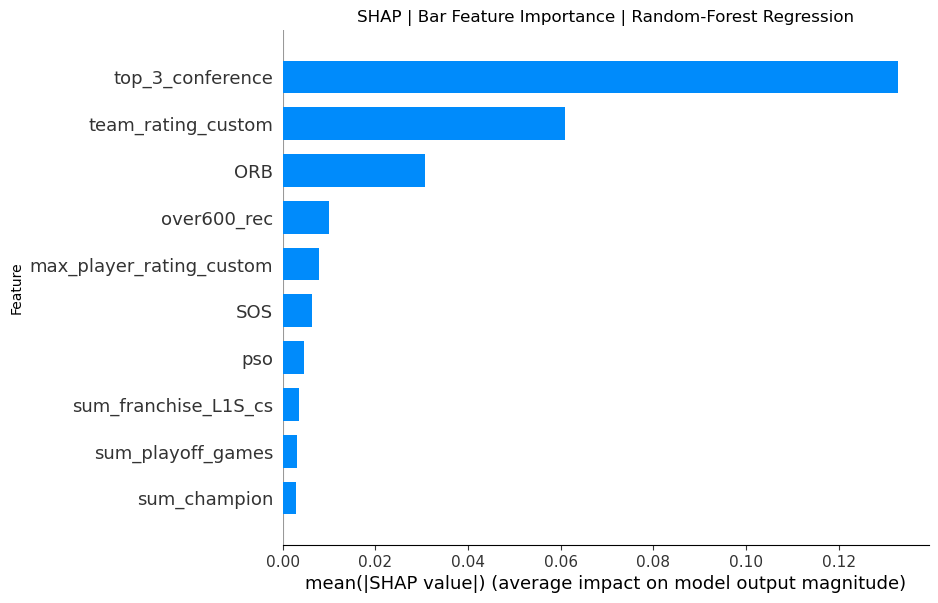

In [60]:
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, plot_type="bar", show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Bar Feature Importance | Random-Forest Regression')

plt.savefig("rf_shap_bar.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("rf_shap_bar.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rf_shap_bar.png")

plt.ylabel("Feature")
plt.show()

Top 10 Features:
['top_3_conference', 'team_rating_custom', 'ORB', 'over600_rec', 'max_player_rating_custom', 'SOS', 'pso', 'sum_franchise_L1S_cs', 'sum_playoff_games', 'sum_champion']


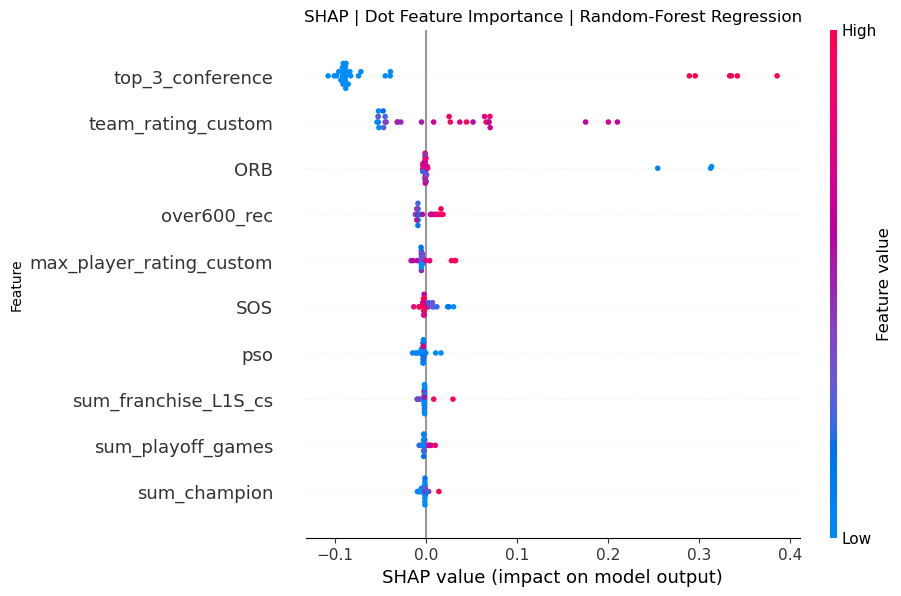

In [61]:

explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Dot Feature Importance | Random-Forest Regression')

plt.savefig("rf_shap_dot.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("rf_shap_dot.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rf_shap_dot.png")

plt.ylabel("Feature")
plt.show()

## Ridge Regression:

In [30]:
df = pd.read_csv("NBA Champion RawData.csv")
print(list(df.columns))

['Season', 'Team/Season', 'Team', 'Team ID', 'Team ID/Season', 'Conference', 'Conference/Season', 'max_player', 'playoff_seed', 'po_seed_conference', 'rd_1_matchup_season', 'rd_2_matchup_season', 'rd_3_matchup_season', 'rd_4_matchup_season', 'sum_po_max_player', 'conference 5=> rec', 'conference_OR', 'conference_SRS', 'conference_age', 'pre_playoff_odds', 'pso', 'champion', 'champion_share', 'make_playoffs', 'top_3_conference', 'rk_conference', 'overall_record', 'over500_rec', 'over600_rec', '20 =< wins', '5 => rec', 'home_rec', 'road_rec', 'pre_all_star', 'post_all_star', '3 => rec', '10 =< rec', 'sum_coach_playoff_games', 'sum_coy_shares', 'sum_playoff_games', 'sum_champion', 'sum_champion_share', 'sum_mvp_shares', 'sum_all_defense', 'sum_all_nba', 'sum_dpoy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_all_stars', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'sum_L3S_mvp_shares', 'sum_L5S_mvp_shares', 'sum_franchise_L1S_cs', 'sum_franchise

In [29]:
data_columns = ['conference_SRS', 'conference_age', 'pre_playoff_odds', 'pso', 'champion', 'champion_share', 'make_playoffs', 'top_3_conference', 'rk_conference', 'overall_record', 'over500_rec', 'over600_rec', '20 =< wins', '5 => rec', 'home_rec', 'road_rec', 'pre_all_star', 'post_all_star', '3 => rec', '10 =< rec', 'sum_coach_playoff_games', 'sum_coy_shares', 'sum_playoff_games', 'sum_champion', 'sum_champion_share', 'sum_mvp_shares', 'sum_all_defense', 'sum_all_nba', 'sum_dpoy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_all_stars', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'sum_L3S_mvp_shares', 'sum_L5S_mvp_shares', 'sum_franchise_L1S_cs', 'sum_franchise_L3S_cs', 'sum_franchise_L5S_cs', 'sum_franchise_L8S_cs', 'team_rating_custom', 'max_player_rating_custom', 'past/curr_mvp_fmvp', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG_opp', 'FGA_opp', 'FG%_opp', '3P_opp', '3PA_opp', '3P%_opp', '2P_opp', '2PA_opp', '2P%_opp', 'FT_opp', 'FTA_opp', 'FT%_opp', 'ORB_opp', 'DRB_opp', 'TRB_opp', 'AST_opp', 'STL_opp', 'BLK_opp', 'TOV_opp', 'PF_opp', 'PTS_opp', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Offense Four Factors|eFG%', 'Offense Four Factors|TOV%', 'Offense Four Factors|ORB%', 'Offense Four Factors|FT/FGA', 'Defense Four Factors|eFG%', 'Defense Four Factors|TOV%', 'Defense Four Factors|DRB%', 'Defense Four Factors|FT/FGA']

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

In [92]:
correlation_matrix = data.corr()

correlation_threshold = .75

columns_to_remove = set()
#print("Columns to be Removed:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            if feature_i not in columns_to_remove:
                columns_to_remove.add(feature_j)
                #print(f"{feature_j} (correlated with {feature_i}): {correlation:.2f}")

data_filtered = data.drop(columns=columns_to_remove)

In [93]:
print("Columns in data_filtered:")
print(", ".join(f"'{column}'" for column in data_filtered.columns))

print("\nColumns that were removed:")
print(", ".join(f"'{removed_column}'" for removed_column in columns_to_remove))

Columns in data_filtered:
'FG', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'FG%_opp', '3P%_opp', '2P%_opp', 'FT%_opp', 'ORB_opp', 'DRB_opp', 'TRB_opp', 'AST_opp', 'BLK_opp', 'Age', 'W', 'SOS'

Columns that were removed:
'Offense Four Factors|ORB%', '2PA_opp', '3PA', 'Defense Four Factors|TOV%', 'FG%', 'TOV_opp', 'DRtg', 'Defense Four Factors|FT/FGA', 'FTr', '2PA', '2P_opp', 'Offense Four Factors|FT/FGA', 'FT_opp', 'TS%', 'SRS', '3PAr', 'PF_opp', 'FGA', 'AST', 'FTA', 'FG_opp', 'MOV', 'PL', 'Offense Four Factors|TOV%', '3PA_opp', 'NRtg', 'Pace', 'PTS', 'Defense Four Factors|DRB%', 'Defense Four Factors|eFG%', 'FTA_opp', '3P_opp', 'FGA_opp', 'PTS_opp', 'ORtg', 'Offense Four Factors|eFG%', 'L', 'STL_opp', 'PW'


In [31]:
features = ['top_3_conference', 'SRS', 'FG', '3P', '3P%', '2P', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'FG%_opp', '3P%_opp','FT%_opp', 'ORB_opp', 'DRB_opp', 'TRB_opp', 'AST_opp', 'BLK_opp', 'Age', 'SOS', 'pso']

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 26


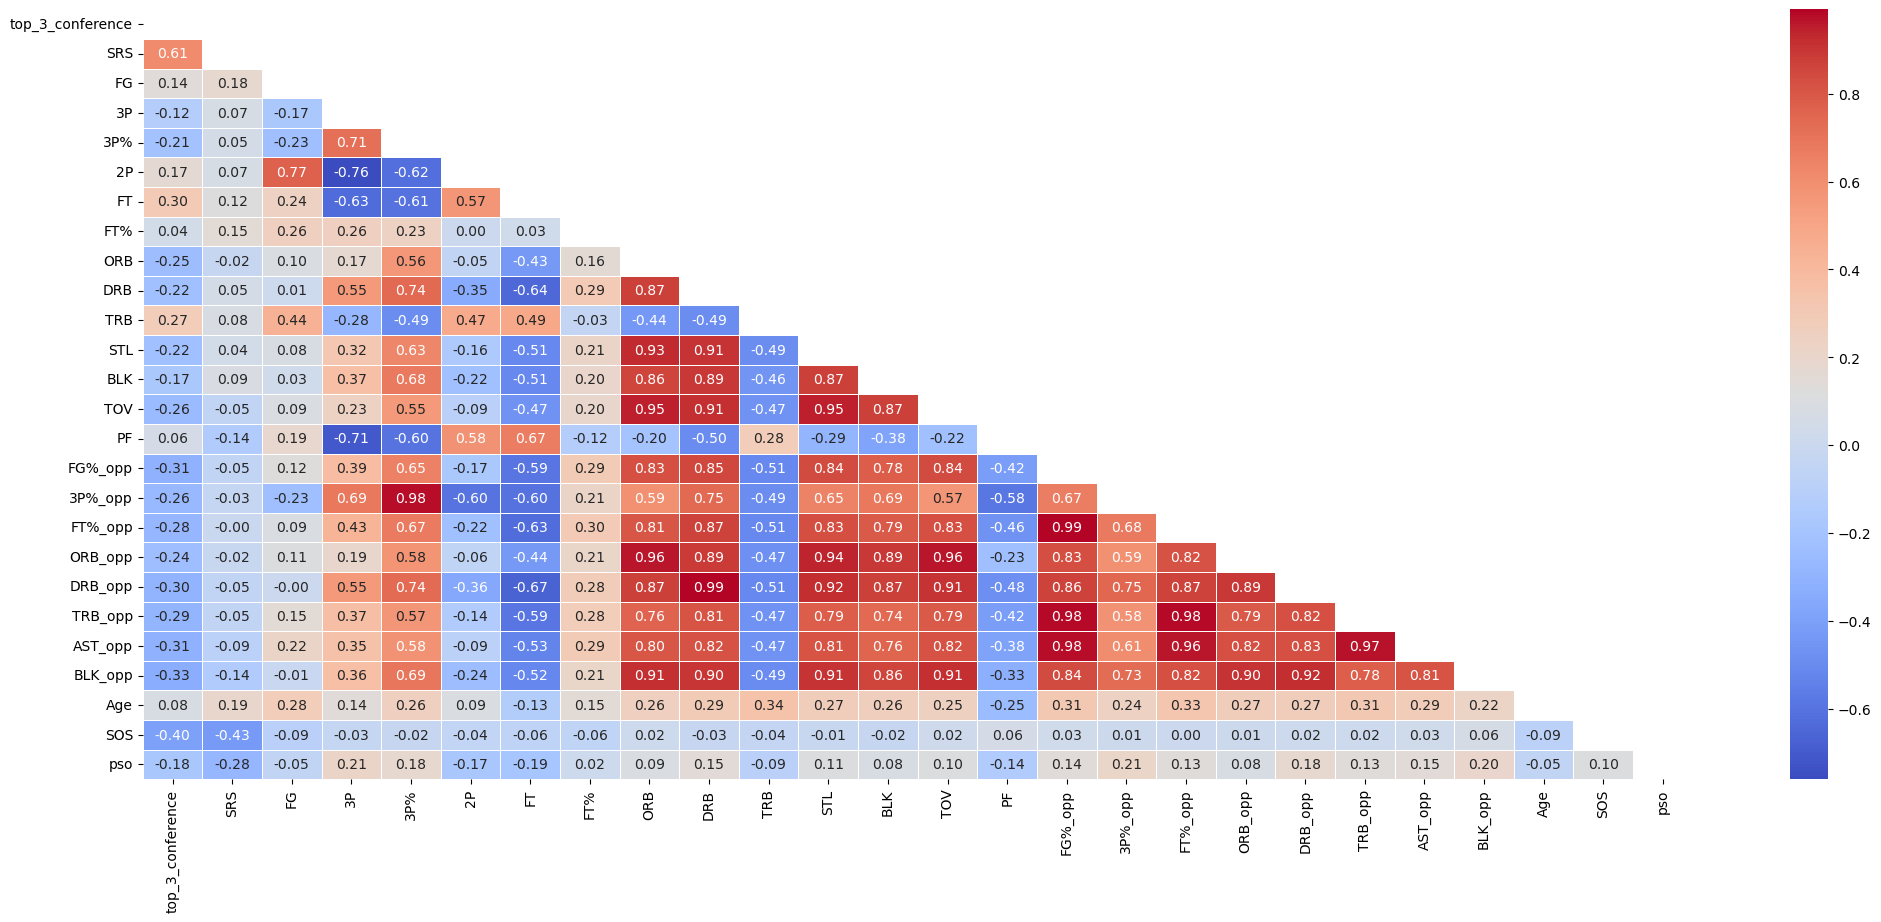

In [32]:
selected_features_data = data[features]
correlation_matrix = selected_features_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.show()

Results:

    Season                    Team  champion_share  predicted_cs
13    2024          Boston Celtics          1.0000      0.661188
17    2024  Minnesota Timberwolves          0.5625      0.570156
14    2024          Denver Nuggets          0.4375      0.536527
15    2024   Oklahoma City Thunder          0.3750      0.530050
20    2024         Milwaukee Bucks          0.1250      0.507698
18    2024         New York Knicks          0.4375      0.500285
24    2024            Phoenix Suns          0.0000      0.210879
19    2024    Los Angeles Clippers          0.1250      0.187249
26    2024    New Orleans Pelicans          0.0000      0.158905
0     2024   Golden State Warriors          0.0000      0.154226
22    2024        Dallas Mavericks          0.8125      0.145650
25    2024           Orlando Magic          0.1875      0.144246
28    2024              Miami Heat          0.0625      0.143659
16    2024     Cleveland Cavaliers          0.3125      0.138142
---------------

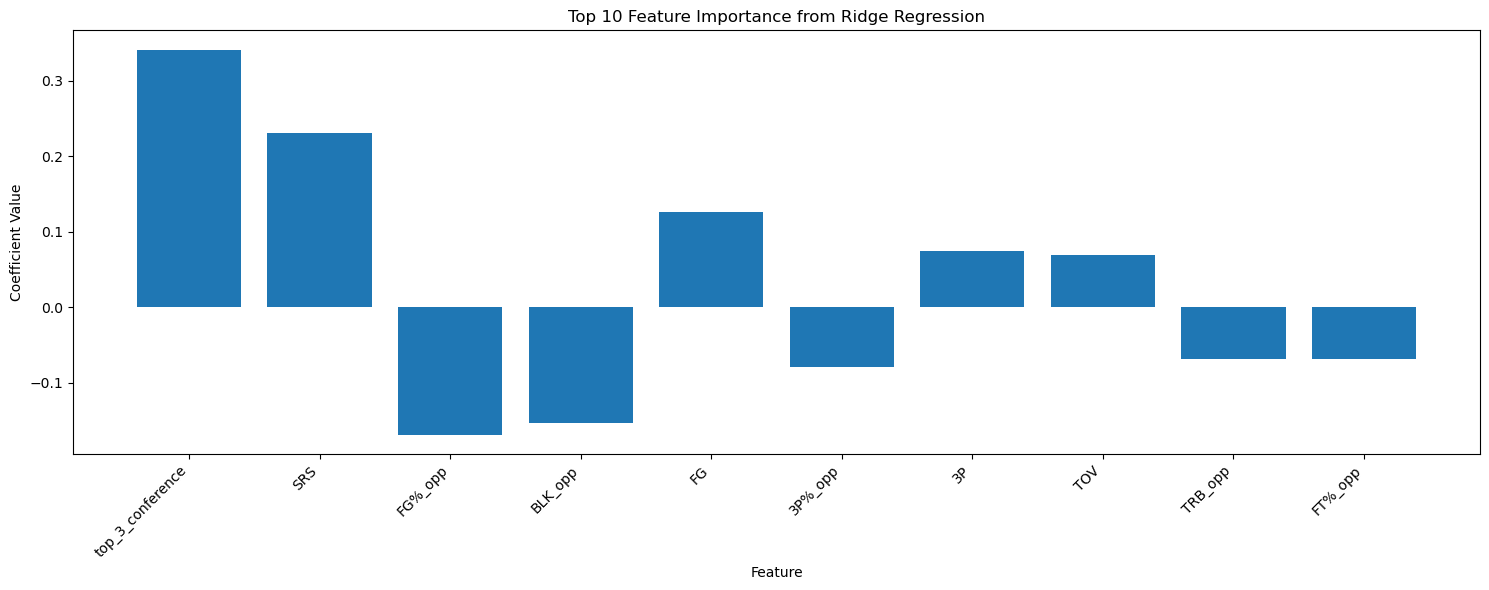

In [33]:
df = pd.read_csv("NBA Champion RawData.csv")
df.drop(df[df['Season'] < 1985].index, inplace = True)

train = df[df["Season"] < 2024].copy()
test = df[df["Season"] == 2024].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features] = sc.transform(train[features])
test[features] = sc.transform(test[features])

rig = Ridge(alpha=0.5)
rig.fit(train[features], train["champion_share"])

predictions = rig.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

print("Results:")
print("=============================================================================\n")
print(frame.head(14))
print("-----------------------------------------------------------------------------\n")

def ndcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        dcg = np.sum(r / np.log2(np.arange(2, r.size + 2)))
        idcg = np.sum(np.sort(r)[::-1] / np.log2(np.arange(2, r.size + 2)))
        return dcg / idcg
    return 0.

def calculate_ndcg(df, k=16):
    true_relevance = df['champion_share'].values
    return ndcg_at_k(true_relevance, k)

ndcg_score_true = calculate_ndcg(frame, k=16)

print("NDCG Scores: ")
print("=============================================================================\n")
print("True NDCG @: ", ndcg_score_true)
print("-----------------------------------------------------------------------------\n")

coefficients = rig.coef_
feature_coefficients = dict(zip(features, coefficients))
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

top_features = sorted_feature_coefficients[:10]
features_names = [x[0] for x in top_features]
coeff_values = [x[1] for x in top_features]

plt.figure(figsize=(15, 6))
plt.bar(features_names, coeff_values)
plt.title('Top 10 Feature Importance from Ridge Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

predictions = rig.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
rig_reg_frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
rig_reg_frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

In [34]:
actual = frame.sort_values("champion_share", ascending=False)
predicted = frame.sort_values("predicted_cs", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(1) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame):
    actual = frame.sort_values("champion_share", ascending=False).head(1) #HEAD

    predicted = frame.sort_values("predicted_cs", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame)
print("=============================================================================\n")
print("AP Champion: ", ap)

Ranking Accuracy (Champion):

   Season_x            Team  champion_share_x  predicted_cs_x  Rank  Season_y  champion_share_y  predicted_cs_y  Predicted Rank
0      2024  Boston Celtics               1.0        0.661188     1      2024               1.0        0.661188               1

AP Champion:  1.0


In [35]:

rig_reg_combined_predictions = pd.DataFrame(columns=["Season", "Team/Season", "Team", "predicted_cs", "champion_share"])

all_predictions = []
aps = []
ndcgs = []

backtest_seasons = [2024,2023,2022,2021, 2020]
#backtest_seasons = list(range(2024, 1959, -1))

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    rig.fit(train[features], train['champion_share'])
    predictions = rig.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
    frame = pd.concat([test[["Team", "champion_share", "Season"]], predictions_df], axis=1)

    frame['Team/Season'] = frame['Team'] + ' ' + frame['Season'].astype(str)

    rig_reg_combined_predictions = pd.concat([rig_reg_combined_predictions, frame], ignore_index=True)

    if not frame.empty:
        all_predictions.append(frame)
        ap = find_ap(frame)
        aps.append(ap)

        ndcg = ndcg_score(frame["champion_share"].values.reshape(1, -1), predictions.reshape(1, -1))
        ndcgs.append(ndcg)

        reciprocal_ap = 1 / ap
        print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)} | NDCG: {round(ndcg, 2)}")
    else:
        print(f"No data for Season {season}")

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted_cs", ascending=False).head(10)

    print(f"\nTop 5 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted_cs", "champion_share"]])

average_ndcg = np.mean(ndcgs)
average_ap = np.mean(aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_ndcg = 1.0 / average_ndcg

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"Average Champion Rank: {round(reciprocal_average_ap, 2)} | Reciprocal NDCG: {round(reciprocal_ndcg, 2)}")
print(f"Min Champion Rank: {round(reciprocal_min_ap, 2)}")
print(f"Max Champion Rank: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

rig_reg_combined_predictions.to_csv("rig_reg_nba_preds.csv", index=False)

Champion AP for Season 2024: 1.0 | Reciprocal: 1.0 | NDCG: 0.92
Champion AP for Season 2023: 0.33 | Reciprocal: 3.0 | NDCG: 0.8
Champion AP for Season 2022: 0.5 | Reciprocal: 2.0 | NDCG: 0.89
Champion AP for Season 2021: 0.5 | Reciprocal: 2.0 | NDCG: 0.86
Champion AP for Season 2020: 0.5 | Reciprocal: 2.0 | NDCG: 0.82

Top 5 Predicted Teams for Season 2024:
                      Team  predicted_cs  champion_share
13          Boston Celtics      0.661188          1.0000
17  Minnesota Timberwolves      0.570156          0.5625
14          Denver Nuggets      0.536527          0.4375
15   Oklahoma City Thunder      0.530050          0.3750
20         Milwaukee Bucks      0.507698          0.1250
18         New York Knicks      0.500285          0.4375
24            Phoenix Suns      0.210879          0.0000
19    Los Angeles Clippers      0.187249          0.1250
26    New Orleans Pelicans      0.158905          0.0000
0    Golden State Warriors      0.154226          0.0000

Top 5 Predic

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
